In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CNN

##Import

In [10]:
# ! nvidia-smi
# !pip install tensorflow-gpu
# # !pip install livelossplot
!pip install pyyaml h5py

In [11]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D ,Dropout, BatchNormalization, SpatialDropout1D
from tensorflow.keras.metrics import categorical_crossentropy
# from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.utils import shuffle 
from tensorflow.keras import regularizers
import seaborn as sns
import matplotlib.pyplot as plt 
# import re
import itertools
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
# from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
# from livelossplot import PlotLossesKeras

##Conversion function deprecated by user

In [ ]:
# # function to convert a DNA sequence string to a numpy array
# # converts to lower case, changes any non 'acgt' characters to 'n'
# def string_to_array(my_string):
#     my_string = my_string.lower()
#     my_string = re.sub('[^acgt]', 'z', my_string)
#     my_array = np.array(list(my_string))
#     return my_array

# # create a label encoder with 'acgtn' alphabet
# label_encoder = LabelEncoder()
# label_encoder.fit(np.array(['a','c','g','t','z']))

In [ ]:
# # function to encode a DNA sequence string as an ordinal vector
# # returns a numpy vector with a=0.25, c=0.50, g=0.75, t=1.00, n=0.00
# def ordinal_encoder(my_array):
#     integer_encoded = label_encoder.transform(my_array)
#     float_encoded = integer_encoded.astype("float32")
#     float_encoded[float_encoded == 0] = 0.25 # A
#     float_encoded[float_encoded == 1] = 0.50 # C
#     float_encoded[float_encoded == 2] = 0.75 # G
#     float_encoded[float_encoded == 3] = 1.00 # T
#     float_encoded[float_encoded == 4] = 0.00 # anything else, z
#     return float_encoded

In [ ]:
# def conversion(tdf):
#     data = []
#     for i in tdf.index:
#         val = tdf['seq'].iloc[i]
#         val = ordinal_encoder(string_to_array(val))
#         # data.append(np.asarray(val))
#         data.append(val)
#     return data

##Convert Function

In [12]:
def seq_conversion(matrix):
    # max_value=0
    # for i in range (0,len(matrix)):
    #     if (len(matrix[i])>max_value):
    #         max_value=len(matrix[i])
    # vectorSize=max_value
    # #  maxValue is 29907 extra padding on both side in totla 20
    vectorSize= 29907
    print('vectorSize', vectorSize)

    out_data=[]
    for i in range (len(matrix)):
        sample=np.zeros(vectorSize)
        for j in range (0, len(matrix[i])):
            if(matrix[i][j]=='C'):
                sample[j]=0.25
            elif(matrix[i][j]=='T'):
                sample[j]=0.50
            elif(matrix[i][j]=='G'):
                sample[j]=0.75
            elif(matrix[i][j]=='A'):
                sample[j]=1.0
            else:
                sample[j]=0.0
        out_data.append(sample)
    return out_data

##Train DataSets


In [51]:
train_path = "/content/drive/MyDrive/Thesis/trim_data/train/train.csv"
df = pd.read_csv(train_path)
df

,seq,variant_label
0,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...,1
1,GTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTNNNN...,1
2,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1
3,CAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGA...,1
4,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1
...,...,...
1095,CTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCT...,1
1096,TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTG...,1
1097,TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTG...,1
1098,TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTG...,1


In [52]:
# df.loc[df['variant_label'] ==  5, 'variant_label'] = 0
# df['variant_label'].unique()

In [53]:
# df.to_csv(train_path,index=False)

In [54]:
# converting the data as well as store it into a list
# train_data = conversion(df)
# train_data = tf.convert_to_tensor(seq_conversion(train_data),dtype=tf.float32)
train_data = df['seq'].values.ravel()
train_data = np.asarray(seq_conversion(train_data), dtype=np.float32)                      
train_labels = df['variant_label'].to_numpy().astype('int8')
# train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int8)
# train_data, train_labels = shuffle(train_data, train_labels)

vectorSize 29907


##Valid DataSets


In [55]:
valid_path =  "/content/drive/MyDrive/Thesis/trim_data/valid/valid.csv"
vf = pd.read_csv(valid_path)
vf

,seq,variant_label
0,AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...,1
1,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,1
2,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,1
3,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,1
4,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1
...,...,...
96,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,0
97,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,0
98,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,0
99,CTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGT...,0


In [56]:
# vf.loc[vf['variant_label'] ==  5, 'variant_label'] = 0
# vf['variant_label'].unique()

In [57]:
# vf.to_csv(valid_path,index=False)

In [58]:
# converting the data as well as store it into a list
# valid_data = conversion(vf)
valid_data = vf['seq'].values.ravel()
valid_data = np.asarray(seq_conversion(valid_data), dtype=np.float32)
valid_labels = vf['variant_label'].to_numpy().astype('int8')
valid_data, valid_labels = shuffle(valid_data, valid_labels)

vectorSize 29907


##Test DataSets


In [59]:
test_path =  "/content/drive/MyDrive/Thesis/trim_data/test/test.csv"
pf = pd.read_csv(test_path)
pf

,seq,variant_label
0,GCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAG...,1
1,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1
2,AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...,1
3,ATTAAAGGTTTATACCTTCCCAGGTANNNNNNNNNNNNACTTTCGA...,1
4,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1
...,...,...
96,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,0
97,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,0
98,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,0
99,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,0


In [60]:
# pf.loc[pf['variant_label'] ==  5, 'variant_label'] = 0
# pf['variant_label'].unique()

In [61]:
# pf.to_csv(test_path,index=False)

In [62]:
# converting the data as well as store it into a list
# test_data = conversion(pf)
test_data = pf['seq'].values.ravel()
test_data = np.asarray(seq_conversion(test_data), dtype=np.float32)
test_labels = pf['variant_label'].to_numpy().astype('int8')
test_data, test_labels = shuffle(test_data, test_labels)

vectorSize 29907


##Model

In [63]:
# Change the shape of the data, for fit the data into the model
# train_data = train_data.reshape(1001,29907,1)
train_data = train_data.reshape(-1,29907,1)
valid_data = valid_data.reshape(-1,29907,1)
test_data = test_data.reshape(-1,29907,1)

In [67]:
# Build the model
def create_model():
    
    num_classes = 5
    model = Sequential([
        Conv1D(filters=100, kernel_size=21, strides=1,
    padding="same", input_shape=(29907,1), activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(rate=0.5),
    MaxPooling1D(pool_size=203, strides=1, padding='valid'),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

    # compile the model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate= 0.0001),
              metrics=['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29907, 100)        2200      
_________________________________________________________________
dropout_2 (Dropout)          (None, 29907, 100)        0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 29705, 100)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2970500)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 14852505  
Total params: 14,854,705
Trainable params: 14,854,705
Non-trainable params: 0
_________________________________________________________________


In [72]:
checkpoint_path = '/content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt'
model.load_weights(checkpoint_path)

###cnn_weight2 gave 93% accuracy
###cnn_weight3 gave 93% accuracy


In [73]:
checkpoint_path = '/content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# model.load_weights(checkpoint_path)

# Train the model
batchSize = 1
epoch = 5
# cb=[PlotLossesKeras()]
model.fit(train_data, train_labels,
          batch_size=batchSize,
          epochs=epoch,
          shuffle=True,
          verbose=2,
          validation_data=(valid_data, valid_labels),
          callbacks=[cp_callback])

Epoch 1/5
1100/1100 - 1656s - loss: 0.9642 - accuracy: 0.9636 - val_loss: 8.7938 - val_accuracy: 0.8416

Epoch 00001: saving model to /content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt
Epoch 2/5
1100/1100 - 1673s - loss: 1.0710 - accuracy: 0.9745 - val_loss: 8.4042 - val_accuracy: 0.8614

Epoch 00002: saving model to /content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt
Epoch 3/5
1100/1100 - 1702s - loss: 0.4353 - accuracy: 0.9700 - val_loss: 9.3138 - val_accuracy: 0.8218

Epoch 00003: saving model to /content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt
Epoch 4/5
1100/1100 - 1703s - loss: 0.3662 - accuracy: 0.9809 - val_loss: 9.2361 - val_accuracy: 0.8416

Epoch 00004: saving model to /content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt
Epoch 5/5
1100/1100 - 1684s - loss: 0.1079 - accuracy: 0.9845 - val_loss: 7.3773 - val_accuracy: 0.8614

Epoch 00005: saving model to /content/drive/MyDrive/Thesis/code/cnnH_weights.ckpt


In [46]:
df['variant_label'].unique()

array([1, 2, 3, 4, 0])

In [ ]:
# 1100/1100 - 1263s - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.2733 - val_accuracy: 0.9505 last weight 3

##deprecated

In [ ]:
# checkpoint_path = '/content/drive/MyDrive/Thesis/code/cnn_weights.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)
# This creates a single collection of TensorFlow checkpoint
# files that are updated at the end of each epoch:
# os.listdir(checkpoint_dir)
# model.load_weights(checkpoint_path)

In [ ]:
# # Build the model
# # genome sequence base pair/window should be in between 18-23
# # kernal_regularizer 0.0001 is optimal but need to test more
# num_classes = 5
# model = Sequential()
# model.add(Conv1D(filters=100, kernel_size=21, strides=1,
#     padding="same", input_shape=(29907,1), activation='relu',kernel_initializer='he_uniform' ,kernel_regularizer=regularizers.l2(0.0001) )) 
# # model.add(Conv1D(filters=100, kernel_size=21, strides=1,
# #     padding="same", activation='relu')) 
# model.add(Dropout(rate=0.5)) 
# model.add(MaxPooling1D(pool_size=148, strides=1, padding='valid'))
# model.add(Flatten())
# # model.add(Dense(16, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
# # Build the model
# # genome sequence base pair/window should be in between 18-23
# num_classes = 5
# model = Sequential()
# model.add(Conv1D(filters=100, kernel_size=21, strides=1,
#     padding="same", input_shape=(29927,1), activation='relu')) 
# model.add(MaxPooling1D(pool_size=148, strides=1, padding='same'))
# model.add(Dropout(rate=0.5))
# model.add(Conv1D(filters=100, kernel_size=21, strides=1,
#     padding="same", activation='relu')) 
# model.add(Dropout(rate=0.5))
# model.add(Conv1D(filters=100, kernel_size=21, strides=1,
#     padding="same", activation='relu')) 
# model.add(Flatten())
# model.add(Dense(20, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

##Save model

In [ ]:
# model.load_weights('/content/drive/MyDrive/Thesis/code/save_model_weights_he10/')
# model.save_weights('/content/drive/MyDrive/Thesis/code/save_model_weights_he10/')
# model.save(('/content/drive/MyDrive/Thesis/code/save_model_he10/'))

##Plot

In [ ]:
# # Graph for visual representation
# %matplotlib inline
# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
# plt.title('model train vs validation loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

##Prediction

In [39]:
predictions = model.predict(test_data,batch_size=1,verbose=0)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true = test_labels, y_pred= rounded_predictions)

In [40]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19  0  0  1  0]
 [ 0 21  0  0  0]
 [ 0  0 20  0  0]
 [ 1  0  2 17  0]
 [ 3  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       0.94      0.85      0.89        20
           4       1.00      0.85      0.92        20

    accuracy                           0.93       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.93      0.93       101



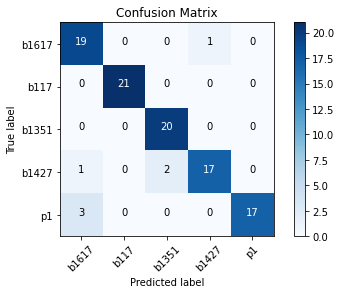

In [41]:
cm_plot_labels = ['b1617','b117','b1351','b1427','p1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print(classification_report(test_labels,rounded_predictions))



*   Confusion matrix, without normalization cnn_weight3
[[19  0  0  1  0]
 [ 0 21  0  0  0]
 [ 0  0 20  0  0]
 [ 1  0  2 17  0]
 [ 3  0  0  0 17]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       0.94      0.85      0.89        20
           4       1.00      0.85      0.92        20

    accuracy                           0.93       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.93      0.93       101




In [42]:
loss, acc = model.evaluate(test_data, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 13s - loss: 0.4309 - accuracy: 0.9307
Restored model, accuracy: 93.07%




*   4/4 - 8s - loss: 0.4196 - accuracy: 0.9307
Restored model, accuracy: 93.07% cnn_weight3
*   List item



In [43]:
# %matplotlib inline
# cm= confusion_matrix(y_test,y_pred)
# sns.heatmap(cm,annot=True,cmap='BuPu')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.savefig('/content/drive/My Drive/Thesis/code/cnn_fasta_model.pdf',bbox_inches='tight')